# Лабораторная работа 14
Задача кластеризации.\
Задание: построить кластеризации (для одинаковых N и k), используя несколько разных ''расстояний'' и разные начальные центры (например, рандомные, крайние (≈ max/min по координатам, первые в списке, т.п.).\
Результат — на рисунке (точки разных кластеров изобразить разными цветами; отметить центры кластеров). Т.е. в итоге — не менее 4-х рисунков. Выводить также количество итераций, потребовавшихся для стабилизации кластеров в каждом из случаев.

In [2]:
import seaborn as sns
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from scipy.linalg import hilbert
import unittest
from parameterized import parameterized, parameterized_class
from tabulate import tabulate
import numpy.testing
import matplotlib as mpl
import functools
import scipy as sp
import scipy.special
import scipy.misc
import scipy.integrate
from scipy.spatial import distance
from matplotlib import cm
from colorama import Fore

plt.style.use('default')
sns.color_palette('bright')

from math import sin, exp, sqrt, cos, log

## Реализация k-means

In [3]:
Point = np.array

def euclidian(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def first_k_centroids(points, k):
    return [points[i] for i in range(k)]

def smallest_x_centroids(points, k):
    x, y = zip(*points)
    return [points[i] for i in np.argpartition(x, k)[:k]]

def kmeans(points, k, metric, max_iterations=100, init_centroids=None, gen_centroids=first_k_centroids):
    if init_centroids == None:
        centroids = gen_centroids(points, k)
    else:
        centroids = init_centroids
    per_cluster = len(points) // k

    iterations = 0
    cluster_changed = False
    clusters = {centroid: [] for centroid in centroids}
    clusters[centroids[0]] = points
    while iterations < max_iterations:
        iterations += 1
        # Пересчитываем расстояние до центров и смотрим, изменились ли кластеры
        for cur_centroid, cluster in clusters.items():
            for point in cluster:
                dists = [metric(point, centroid) for centroid in centroids]
                min_dist = np.argmin(dists)
                if centroids[min_dist] != cur_centroid:
                    cluster_changed = True
                    clusters[centroids[min_dist]].append(point)
                    cluster.remove(point)

        # Пересчитываем центры
        for centroid, cluster in clusters.copy().items():
            if len(cluster) == 0: continue
            new_centroid = tuple(sum(np.array(cluster)) / len(cluster))
            dists = [metric(point, new_centroid) for point in cluster]
            min_dist = np.argmin(dists)
            if cluster[min_dist] != centroid:
                clusters[cluster[min_dist]] = clusters.pop(centroid)

        centroids = list(clusters.keys())

        if not cluster_changed:
            break
        cluster_changed = False

    return clusters, iterations

In [36]:
def rand_points(N):
    return list(map(tuple, np.random.rand(N, 2)))

def plot(points, k, metric):
    N = len(points)
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80)
    first_ax = ax[0]
    smallest_ax = ax[1]
    init_centroids = first_k_centroids(points, k)
    fig.suptitle(metric.__name__, fontsize=20)

    clusters, iterations = kmeans(points.copy(), k, metric, init_centroids=init_centroids.copy())
    for centroid, cluster in sorted(clusters.items()):
        x, y = zip(*cluster)
        c = first_ax.plot(x, y, 'o')[0].get_color()
        first_ax.plot(centroid[0], centroid[1], 'D', color=c)
    for centroid in init_centroids:
        first_ax.plot(centroid[0], centroid[1], 's', color='black')

    first_ax.set_xlabel('x', fontsize=20)
    first_ax.set_ylabel('y', fontsize=20)
    first_ax.title.set_text(f'Результат k-means, k={k}, N={N}, iterations={iterations}, первые k точек')

    init_centroids = smallest_x_centroids(points, k)
    clusters, iterations = kmeans(points, k, metric, init_centroids=init_centroids)
    for centroid, cluster in sorted(clusters.items()):
        x, y = zip(*cluster)
        c = smallest_ax.plot(x, y, 'o')[0].get_color()
        smallest_ax.plot(centroid[0], centroid[1], 'D', color=c)
    for centroid in init_centroids:
        smallest_ax.plot(centroid[0], centroid[1], 'd', color='black')
    smallest_ax.set_xlabel('x', fontsize=20)
    smallest_ax.set_ylabel('y', fontsize=20)
    smallest_ax.title.set_text(f'Результат k-means, k={k}, N={N}, iterations={iterations}, наименьшие по х точки')

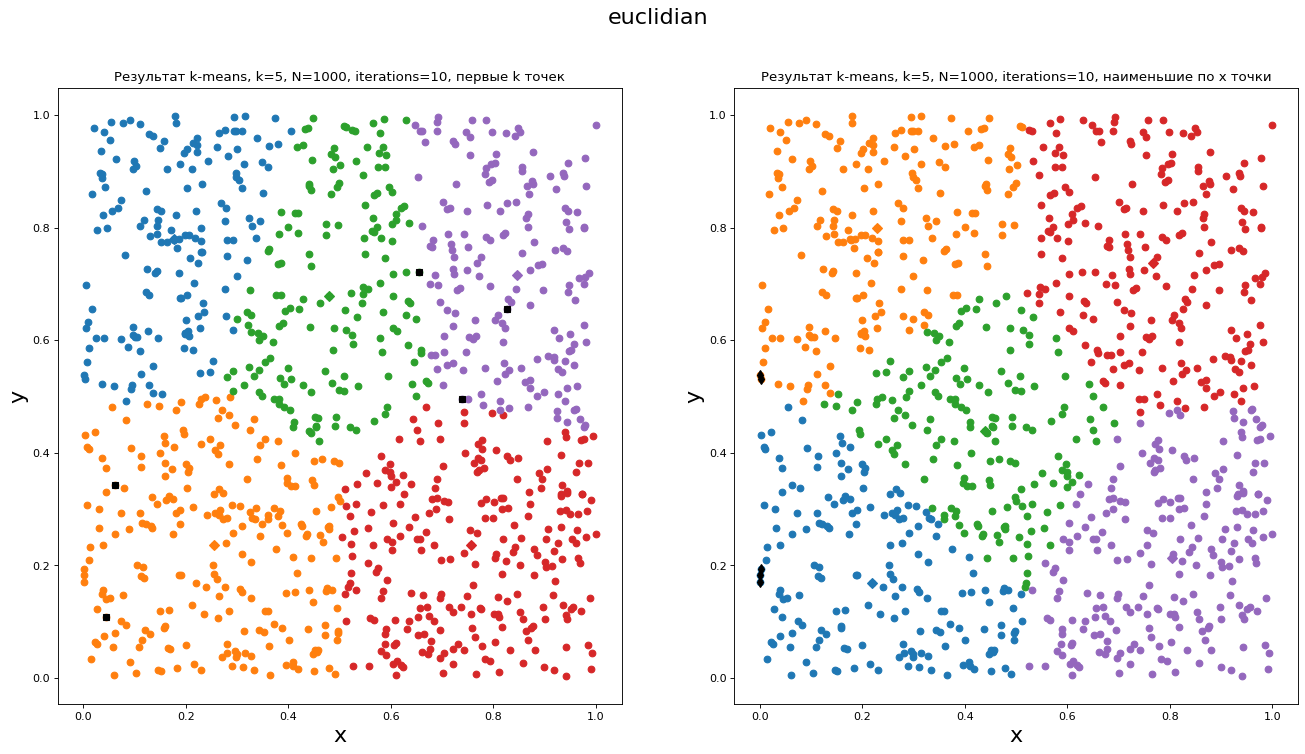

In [37]:
N = 1000
k = 5
points = rand_points(N)
plot(points.copy(), k, euclidian)

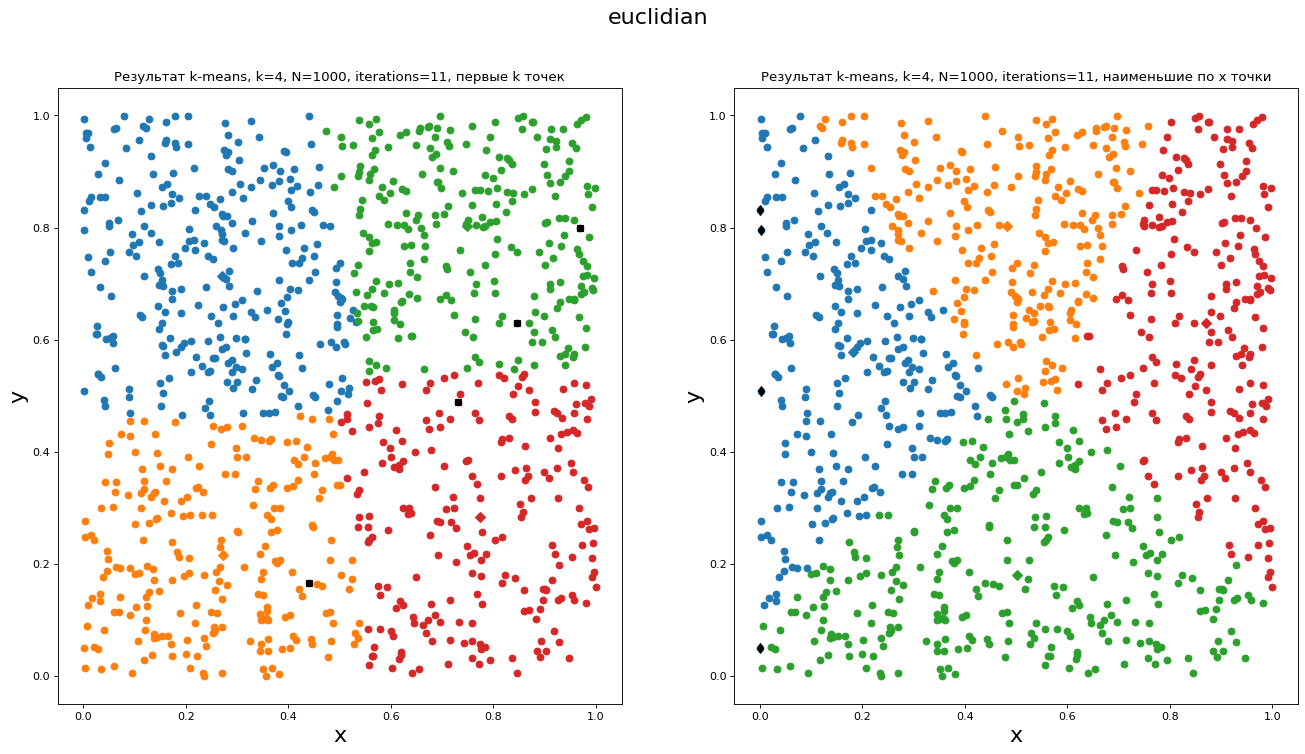

In [38]:
N = 1000
k = 4
points = rand_points(N)
plot(points.copy(), k, euclidian)

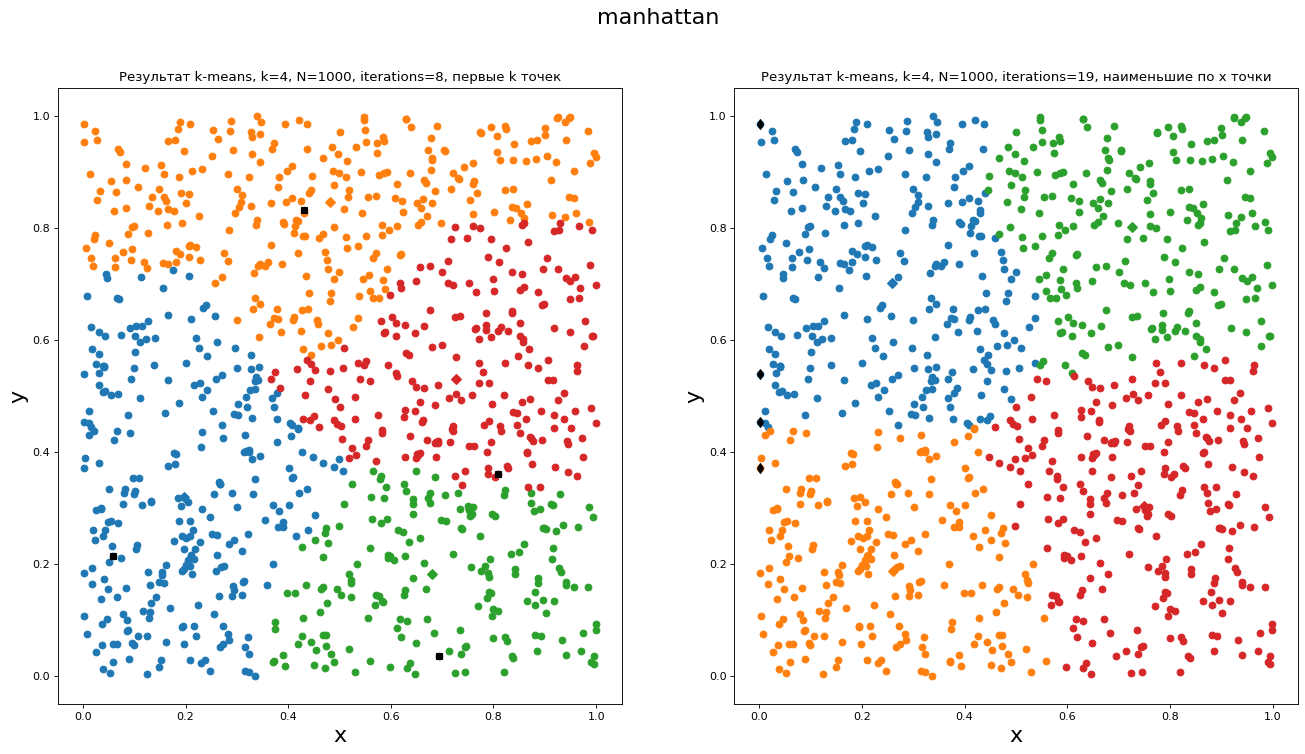

In [39]:
N = 1000
k = 4
points = rand_points(N)
plot(points, k, manhattan)

In [ ]:
N = 1000
k = 5
points = rand_points(N)
plot(points, k, manhattan)